In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os
import glob
import matplotlib.pyplot as plt

### Set path
---

In [2]:
rootDir = r'../../../../../../Dataset/AIFactoryDataset/Data/'

csvPath  = os.path.join(rootDir, r'first_train/')
csvLabel = glob.glob(csvPath+ 'train_visual_reading_mini.csv')

#### img.shape = (852,852)

In [3]:
label =pd.read_csv(csvLabel[0])

In [58]:
backgrnd = np.ones((852,852),dtype=np.uint8)*255

In [117]:
a = label.get('File')
a

0     001.tif
1     001.tif
2     001.tif
3     001.tif
4     001.tif
       ...   
78    004.tif
79    004.tif
80    004.tif
81    004.tif
82    004.tif
Name: File, Length: 83, dtype: object

In [18]:
a = label[0:13]

,File,Class,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,001.tif,7,106,558,175,606,169,614,100,567
1,001.tif,5,278,150,345,136,347,146,280,160
2,001.tif,4,236,143,295,136,296,146,237,153
3,001.tif,3,358,94,382,140,373,145,350,99
4,001.tif,1,194,203,217,230,210,236,187,209
5,001.tif,6,218,230,254,297,245,302,209,235
6,001.tif,7,366,149,444,180,440,190,362,159
7,001.tif,7,508,248,576,199,582,207,514,256
8,001.tif,7,505,145,576,190,570,199,499,154
9,001.tif,7,413,201,471,261,463,269,405,209


In [31]:
b = a.sort_index(axis=1,level='Class')
b

,Class,File,X1,X2,X3,X4,Y1,Y2,Y3,Y4
0,7,001.tif,106,175,169,100,558,606,614,567
1,5,001.tif,278,345,347,280,150,136,146,160
2,4,001.tif,236,295,296,237,143,136,146,153
3,3,001.tif,358,382,373,350,94,140,145,99
4,1,001.tif,194,217,210,187,203,230,236,209
5,6,001.tif,218,254,245,209,230,297,302,235
6,7,001.tif,366,444,440,362,149,180,190,159
7,7,001.tif,508,576,582,514,248,199,207,256
8,7,001.tif,505,576,570,499,145,190,199,154
9,7,001.tif,413,471,463,405,201,261,269,209


In [118]:
c = label.get('File') 
count =0
for i in range(len(c)):
    if c[i] == "001.tif":
        count +=1
print(count)

13


In [128]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()
df7 = pd.DataFrame()

In [145]:
c = pd.DataFrame.append(pd.DataFrame(b.loc[0]),pd.DataFrame(b.loc[1]))
c

,0,1
File,001.tif,NaN
Class,7,NaN
X1,106,NaN
Y1,558,NaN
X2,175,NaN
Y2,606,NaN
X3,169,NaN
Y3,614,NaN
X4,100,NaN
Y4,567,NaN


In [135]:
b = label[0:13]
c = b.get("Class")
c
for i in range(len(c)):
    if c[i] == 1:
        df1.append(b.loc[i])
    elif c[i] == 2:
        df2.append(b.loc[i])
    elif c[i] == 3:
        df3.append(b.loc[i])
    elif c[i] == 4:
        df4.append(b.loc[i])
    elif c[i] == 5:
        df5.append(b.loc[i])
    elif c[i] == 6:
        df6.append(b.loc[i])
    elif c[i] == 7:
        df7.append(b.loc[i])

In [138]:
df3

""


In [121]:
fileCount = 1
fileList = label.get('File')
# 001.tif 면 추가하고 아니면 다음 파일명으로 넘어가기
initFileName = '001.tif'
for i in range(len(fileList)):
    if fileList[i] == initFileName:
        fileCount += 0
    else :
        initFileName = fileList[i]
        fileCount += 1
print(fileCount)

4


In [122]:
fileList[i]

'004.tif'

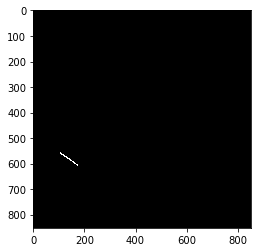

In [86]:
backgrnd = np.ones((852,852),dtype=np.uint8)*255
test = backgrnd
cv.line(test,(106,558),(175,606),0,3)
plt.imshow(test,cmap="gray_r")

In [89]:
label.tail()

,File,Class,X1,Y1,X2,Y2,X3,Y3,X4,Y4
39956,001.tif,7,17,446,46,525,36,528,7,449
39957,001.tif,4,11,469,24,528,14,530,1,472
39958,001.tif,2,130,500,164,529,158,536,124,508
39959,001.tif,6,548,808,616,775,621,784,553,817
39960,001.tif,5,468,801,535,812,534,821,467,811
